In [1]:
import sys
sys.path.append('/Users/isabellechen/git-repos/tutorial/makemore/')

In [2]:
import torch

In [3]:
import matplotlib.pyplot as plt

In [4]:
words=open('names.txt','r').read().split()

b={}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram]=b.get(bigram, 0) + 1
        #print(ch1,ch2)

chars = sorted(set(''.join(words)))
char_to_int = {c: i+1 for i, c in enumerate(chars)}
int_to_char = {i+1: c for i, c in enumerate(chars)}
char_to_int['.']=0
int_to_char[0]='.'
N = torch.zeros((27,27), dtype=torch.int32)

In [5]:
xs, ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [6]:
xs

tensor([ 0,  5, 13, 13,  1])

In [7]:
ys

# For instance, When 5 (i.e. xs[1]) is the input, we want the probability of 13 (i.e. ys[1]) to be high!

tensor([ 5, 13, 13,  1,  0])

# One-hot encodings
- We want integers, but we cannot put it directly into NN.
- NN is made up of neurons, and neurons are made up of weights and biases.
- We shouldn't multiply weights (and biases) by integers.

In [8]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

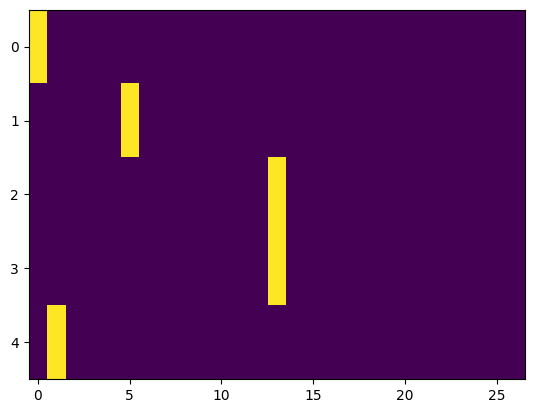

In [9]:
plt.imshow(xenc, aspect='auto')

In [10]:
# Cast the list of ints to list of floats
xenc = xenc.float()
xenc.dtype

torch.float32

In [11]:
# RECALL: W dot x + b

# Initialize W
W = torch.randn((27, 1))
xenc @ W # Matrix multiplication function, which produces the log counts

# Think about this (5, 27) x (27, 1) = (5, 1): 5 activations for 5 inputs

tensor([[-1.1522],
        [ 0.2123],
        [-0.5055],
        [-0.5055],
        [ 0.7118]])

In [12]:
# Taking this one step further, we can have multiple neurons in the hidden layer

W = torch.randn((27, 27)) 
# the first 27 is the number of input neurons
# the second 27 is the number of neuron in the hidden layer
logits = xenc @ W

logits

tensor([[-1.8709e+00, -1.0462e+00, -4.6835e-01,  2.2907e+00,  5.7680e-01,
         -8.7377e-01,  1.4182e+00,  1.3438e+00,  8.8496e-01,  9.0372e-01,
          1.6850e+00, -7.8376e-01,  5.9498e-01, -2.8811e-01, -5.0097e-01,
         -6.5894e-01, -2.3727e+00, -1.0648e+00, -1.3526e+00,  9.6133e-03,
          2.0751e+00, -8.5166e-01, -1.6030e-01, -8.5588e-01, -6.0361e-01,
         -3.4536e-01, -1.4265e+00],
        [-5.1194e-04,  2.1266e+00, -1.2661e+00,  6.8527e-01, -8.1048e-01,
          1.6607e+00,  1.0307e+00, -1.0040e+00,  2.3773e-01,  2.4760e-01,
         -1.9350e+00, -2.0920e-01,  2.7899e-02,  6.3108e-01, -4.9587e-01,
         -1.1853e-01, -2.3463e-01, -6.0408e-01,  2.3138e+00, -2.0228e+00,
         -1.3048e+00, -2.0521e+00,  6.1603e-01,  5.6111e-01, -1.6532e+00,
         -1.0335e+00, -1.1863e+00],
        [-4.8596e-01, -4.2202e-01, -6.7855e-01, -7.7467e-01,  1.4107e+00,
         -2.0777e+00, -1.2289e+00,  2.0390e+00,  1.5057e+00,  3.0532e-01,
         -6.5983e-01,  3.5799e-01,  1.19

In [13]:
counts = logits.exp() # Exponentiate the log counts to get the counts
probs = counts / counts.sum(1, keepdim=True) # Normalize the counts to get the probabilities
probs # The probability of the next character given the current character. The calculation is known as the softmax function

tensor([[0.0032, 0.0072, 0.0129, 0.2039, 0.0367, 0.0086, 0.0852, 0.0791, 0.0500,
         0.0509, 0.1113, 0.0094, 0.0374, 0.0155, 0.0125, 0.0107, 0.0019, 0.0071,
         0.0053, 0.0208, 0.1643, 0.0088, 0.0176, 0.0088, 0.0113, 0.0146, 0.0050],
        [0.0223, 0.1869, 0.0063, 0.0442, 0.0099, 0.1173, 0.0625, 0.0082, 0.0283,
         0.0285, 0.0032, 0.0181, 0.0229, 0.0419, 0.0136, 0.0198, 0.0176, 0.0122,
         0.2253, 0.0029, 0.0060, 0.0029, 0.0413, 0.0391, 0.0043, 0.0079, 0.0068],
        [0.0127, 0.0135, 0.0105, 0.0095, 0.0846, 0.0026, 0.0060, 0.1585, 0.0930,
         0.0280, 0.0107, 0.0295, 0.0681, 0.0107, 0.0083, 0.2174, 0.0098, 0.0254,
         0.0285, 0.0580, 0.0311, 0.0066, 0.0087, 0.0263, 0.0066, 0.0204, 0.0150],
        [0.0127, 0.0135, 0.0105, 0.0095, 0.0846, 0.0026, 0.0060, 0.1585, 0.0930,
         0.0280, 0.0107, 0.0295, 0.0681, 0.0107, 0.0083, 0.2174, 0.0098, 0.0254,
         0.0285, 0.0580, 0.0311, 0.0066, 0.0087, 0.0263, 0.0066, 0.0204, 0.0150],
        [0.0087, 0.1203,

In [14]:
probs[0].sum()

tensor(1.0000)

In [15]:
# How the model is doing with random W

l = len(words[0])+1
nlls = torch.zeros(l)

for i in range(l):
    # i-th bigram
    x=xs[i].item()
    y=ys[i].item()

    # The probability of the next character given the current character
    print(f"Bigram:{int_to_char[x]}{int_to_char[y]}")
    print(f"Input to NN:{x}")
    print(f"Output probability predictions:{probs[i]}")
    print(f"Acutal:{int_to_char[y]}")
    p = probs[i, y]
    print(f"Probability assigned by the net to the correct charater:{p.item()}")
    nll = -torch.log(p).item()
    print(f"Negative log likelihood:{nll}")
    nlls[i] = nll
    print("----\n")

Bigram:.e
Input to NN:0
Output probability predictions:tensor([0.0032, 0.0072, 0.0129, 0.2039, 0.0367, 0.0086, 0.0852, 0.0791, 0.0500,
        0.0509, 0.1113, 0.0094, 0.0374, 0.0155, 0.0125, 0.0107, 0.0019, 0.0071,
        0.0053, 0.0208, 0.1643, 0.0088, 0.0176, 0.0088, 0.0113, 0.0146, 0.0050])
Acutal:e
Probability assigned by the net to the correct charater:0.008610658347606659
Negative log likelihood:4.754754543304443
----

Bigram:em
Input to NN:5
Output probability predictions:tensor([0.0223, 0.1869, 0.0063, 0.0442, 0.0099, 0.1173, 0.0625, 0.0082, 0.0283,
        0.0285, 0.0032, 0.0181, 0.0229, 0.0419, 0.0136, 0.0198, 0.0176, 0.0122,
        0.2253, 0.0029, 0.0060, 0.0029, 0.0413, 0.0391, 0.0043, 0.0079, 0.0068])
Acutal:m
Probability assigned by the net to the correct charater:0.04188360646367073
Negative log likelihood:3.172860860824585
----

Bigram:mm
Input to NN:13
Output probability predictions:tensor([0.0127, 0.0135, 0.0105, 0.0095, 0.0846, 0.0026, 0.0060, 0.1585, 0.0930,
     

# Optimization

In [26]:
xs, ys = [],[]

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [27]:

num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [28]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # Familiar with this? Regularization term!
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7686190605163574
3.3788068294525146
3.161090850830078
3.027186155319214
2.9344842433929443
2.8672313690185547
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188303470611572


In [29]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [30]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(int_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))

dexzmalegllusailezktxha.
kllimittain.
lgdan.
ka.
da.
